In [12]:
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
import seaborn as sns

In [13]:
df = pd.read_csv("output/annotated youtube videos/ytcomments.csv")

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
test = df[["text","categories"]]
test.columns = ["text","categories"]
test.columns = ["text","categories"]
test["category_id"] = test["categories"].factorize()[0]
category_id_df = test[["text","category_id"]].drop_duplicates()
category_id_df= category_id_df.sort_values("category_id")
test = test.fillna("none")
testdata = test

#lots of values are none
test = test[test.categories != "none"]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [15]:

category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[["category_id","text"]].values)
count_vect = CountVectorizer()

In [16]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(test.text).toarray()
labels = test.category_id
features.shape

(844, 187)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(test['text'], test['categories'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [25]:
print(clf.predict(count_vect.transform(["this is utter trash vfollowme "])))


["['composition', 'performance']"]


training model....
making plots


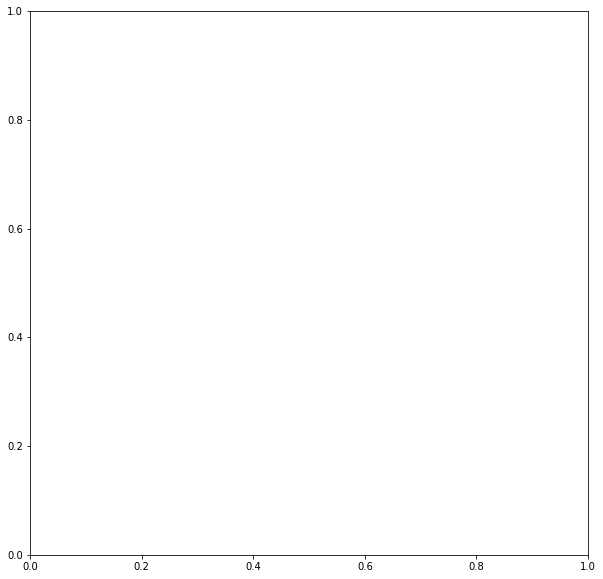

In [19]:
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, test.index, test_size=0.33, random_state=0)
print("training model....")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
print("making plots")
# sns.heatmap(conf_mat, annot=True, fmt='d',xticklabels=category_id_df.text.values, yticklabels=category_id_df.text.values)
# plt.ylabel('Actual')
# plt.xlabel('Predicted')
# plt.show()

In [23]:
print(metrics.classification_report(y_test, y_pred, target_names=test['categories'].unique()))

ValueError: Number of classes, 75, does not match size of target_names, 110. Try specifying the labels parameter